<a href="https://colab.research.google.com/github/aakash1552005/Face-Mask-Detection-Using-CNN/blob/main/Face_Mask_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Mask Detection using Convolutional Neural Network

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2637.jpg', 'with_mask_160.jpg', 'with_mask_2099.jpg', 'with_mask_950.jpg', 'with_mask_1695.jpg']
['with_mask_2169.jpg', 'with_mask_1362.jpg', 'with_mask_977.jpg', 'with_mask_1551.jpg', 'with_mask_3332.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_979.jpg', 'without_mask_2753.jpg', 'without_mask_923.jpg', 'without_mask_2813.jpg', 'without_mask_3585.jpg']
['without_mask_1453.jpg', 'without_mask_1780.jpg', 'without_mask_2199.jpg', 'without_mask_354.jpg', 'without_mask_764.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [11]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

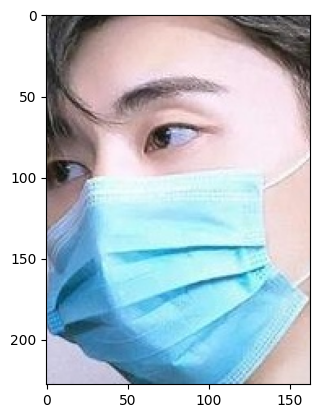

In [15]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

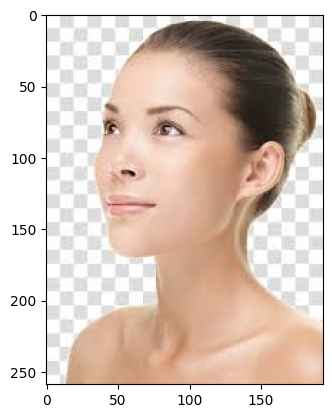

In [16]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [20]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[236, 232, 222],
        [225, 221, 211],
        [212, 207, 199],
        ...,
        [172, 174, 171],
        [183, 184, 183],
        [204, 203, 207]],

       [[171, 166, 160],
        [166, 161, 156],
        [151, 146, 142],
        ...,
        [223, 225, 220],
        [226, 228, 225],
        [231, 231, 233]],

       [[143, 138, 136],
        [128, 122, 123],
        [ 94,  88,  89],
        ...,
        [234, 237, 230],
        [238, 239, 234],
        [235, 235, 233]],

       ...,

       [[102, 105, 120],
        [100, 103, 118],
        [ 97,  99, 114],
        ...,
        [238, 238, 241],
        [238, 238, 241],
        [238, 238, 239]],

       [[104, 107, 122],
        [103, 106, 121],
        [104, 107, 122],
        ...,
        [238, 238, 241],
        [238, 238, 241],
        [238, 238, 239]],

       [[113, 116, 131],
        [113, 116, 131],
        [111, 114, 129],
        ...,
        [238, 238, 241],
        [238, 238, 241],
        [238, 238, 239]]], dtype=uint8)
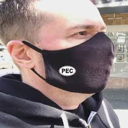

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 41,  48,  64],
        [ 41,  48,  64],
        [ 38,  45,  61],
        ...,
        [168, 145, 129],
        [167, 146, 131],
        [166, 148, 133]],

       [[ 38,  45,  61],
        [ 38,  45,  61],
        [ 36,  43,  59],
        ...,
        [165, 141, 125],
        [165, 144, 129],
        [165, 146, 131]],

       [[ 39,  43,  60],
        [ 38,  41,  58],
        [ 38,  41,  58],
        ...,
        [165, 140, 123],
        [165, 143, 126],
        [165, 144, 129]],

       ...,

       [[187, 162, 138],
        [189, 161, 139],
        [191, 163, 141],
        ...,
        [134, 126, 115],
        [137, 129, 118],
        [138, 130, 119]],

       [[187, 160, 138],
        [187, 159, 137],
        [189, 160, 138],
        ...,
        [133, 124, 115],
        [134, 125, 116],
        [134, 125, 116]],

       [[187, 159, 137],
        [187, 159, 137],
        [188, 159, 137],
        ...,
        [135, 126, 117],
        [135, 126, 117],
        [135, 126, 117]]], dtype=uint8)
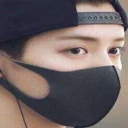

In [32]:
X_train[0]

In [33]:
X_train_scaled[0]

array([[[0.16078431, 0.18823529, 0.25098039],
        [0.16078431, 0.18823529, 0.25098039],
        [0.14901961, 0.17647059, 0.23921569],
        ...,
        [0.65882353, 0.56862745, 0.50588235],
        [0.65490196, 0.57254902, 0.51372549],
        [0.65098039, 0.58039216, 0.52156863]],

       [[0.14901961, 0.17647059, 0.23921569],
        [0.14901961, 0.17647059, 0.23921569],
        [0.14117647, 0.16862745, 0.23137255],
        ...,
        [0.64705882, 0.55294118, 0.49019608],
        [0.64705882, 0.56470588, 0.50588235],
        [0.64705882, 0.57254902, 0.51372549]],

       [[0.15294118, 0.16862745, 0.23529412],
        [0.14901961, 0.16078431, 0.22745098],
        [0.14901961, 0.16078431, 0.22745098],
        ...,
        [0.64705882, 0.54901961, 0.48235294],
        [0.64705882, 0.56078431, 0.49411765],
        [0.64705882, 0.56470588, 0.50588235]],

       ...,

       [[0.73333333, 0.63529412, 0.54117647],
        [0.74117647, 0.63137255, 0.54509804],
        [0.74901961, 0

**Building a Convolutional Neural Networks (CNN)**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9834 - loss: 0.0467 - val_acc: 0.9289 - val_loss: 0.3227
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9779 - loss: 0.0538 - val_acc: 0.9306 - val_loss: 0.2992
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9837 - loss: 0.0453 - val_acc: 0.9421 - val_loss: 0.2930
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9837 - loss: 0.0386 - val_acc: 0.9339 - val_loss: 0.3072
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9868 - loss: 0.0451 - val_acc: 0.9306 - val_loss: 0.3706


**Model Evaluation**

In [42]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - acc: 0.9263 - loss: 0.3440
Test Accuracy = 0.9232296347618103


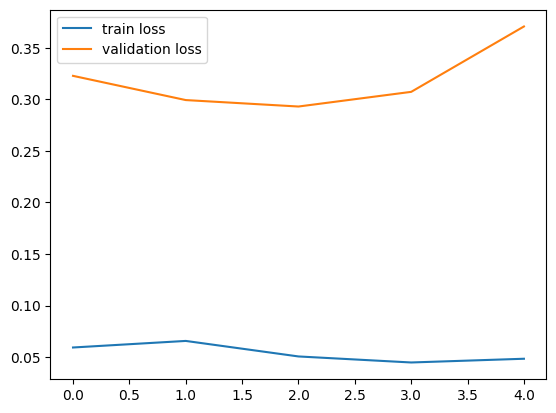

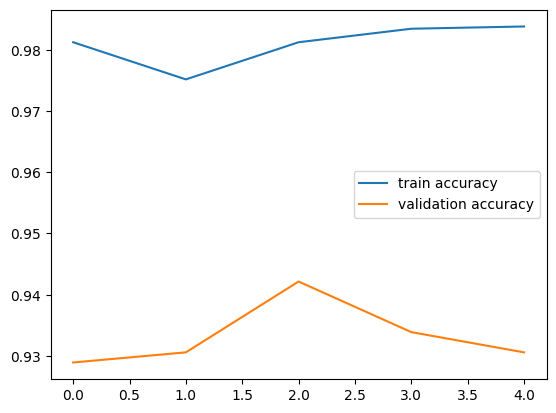

In [44]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/testing.png


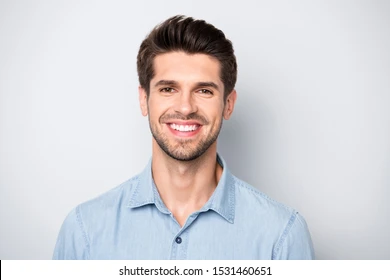

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.639708   0.37127736]]
0
The person in the image is not wearing a mask


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/testing1.jpg


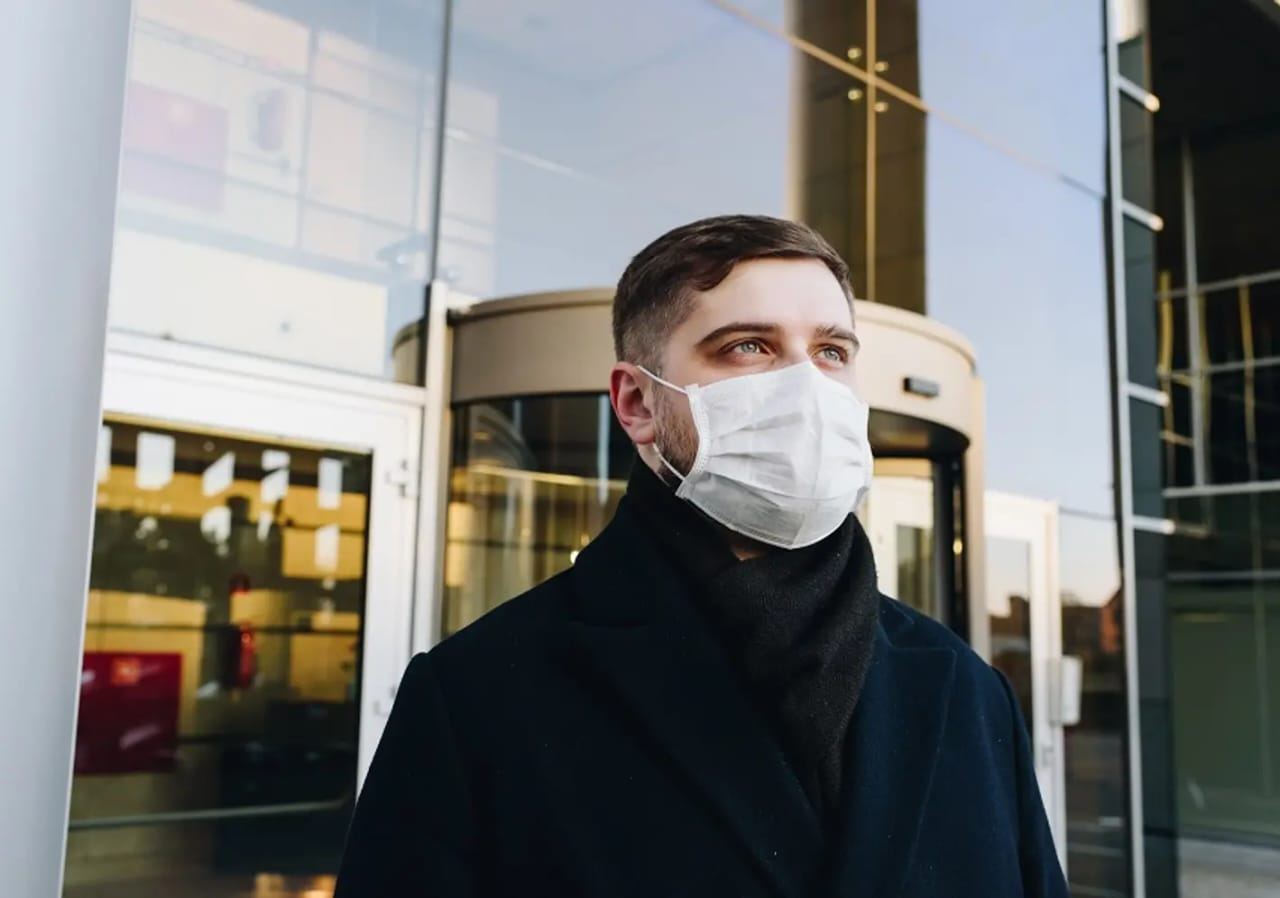

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[4.7448875e-06 9.9997413e-01]]
1
The person in the image is wearing a mask


In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')